In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df = pd.read_excel('/content/UCI_Real_Estate_Valuation.xlsx',sheet_name = 'Sheet1', index_col = 'No')

In [ ]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [ ]:
df.shape

(414, 7)

In [ ]:
df.describe

<bound method NDFrame.describe of      X1 transaction date  X2 house age  \
No                                       
1            2012.916667          32.0   
2            2012.916667          19.5   
3            2013.583333          13.3   
4            2013.500000          13.3   
5            2012.833333           5.0   
..                   ...           ...   
410          2013.000000          13.7   
411          2012.666667           5.6   
412          2013.250000          18.8   
413          2013.000000           8.1   
414          2013.500000           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
No                                                                             
1                                  84.87882                               10   
2                                 306.59470                                9   
3                                 561.98450                                5   
4                  

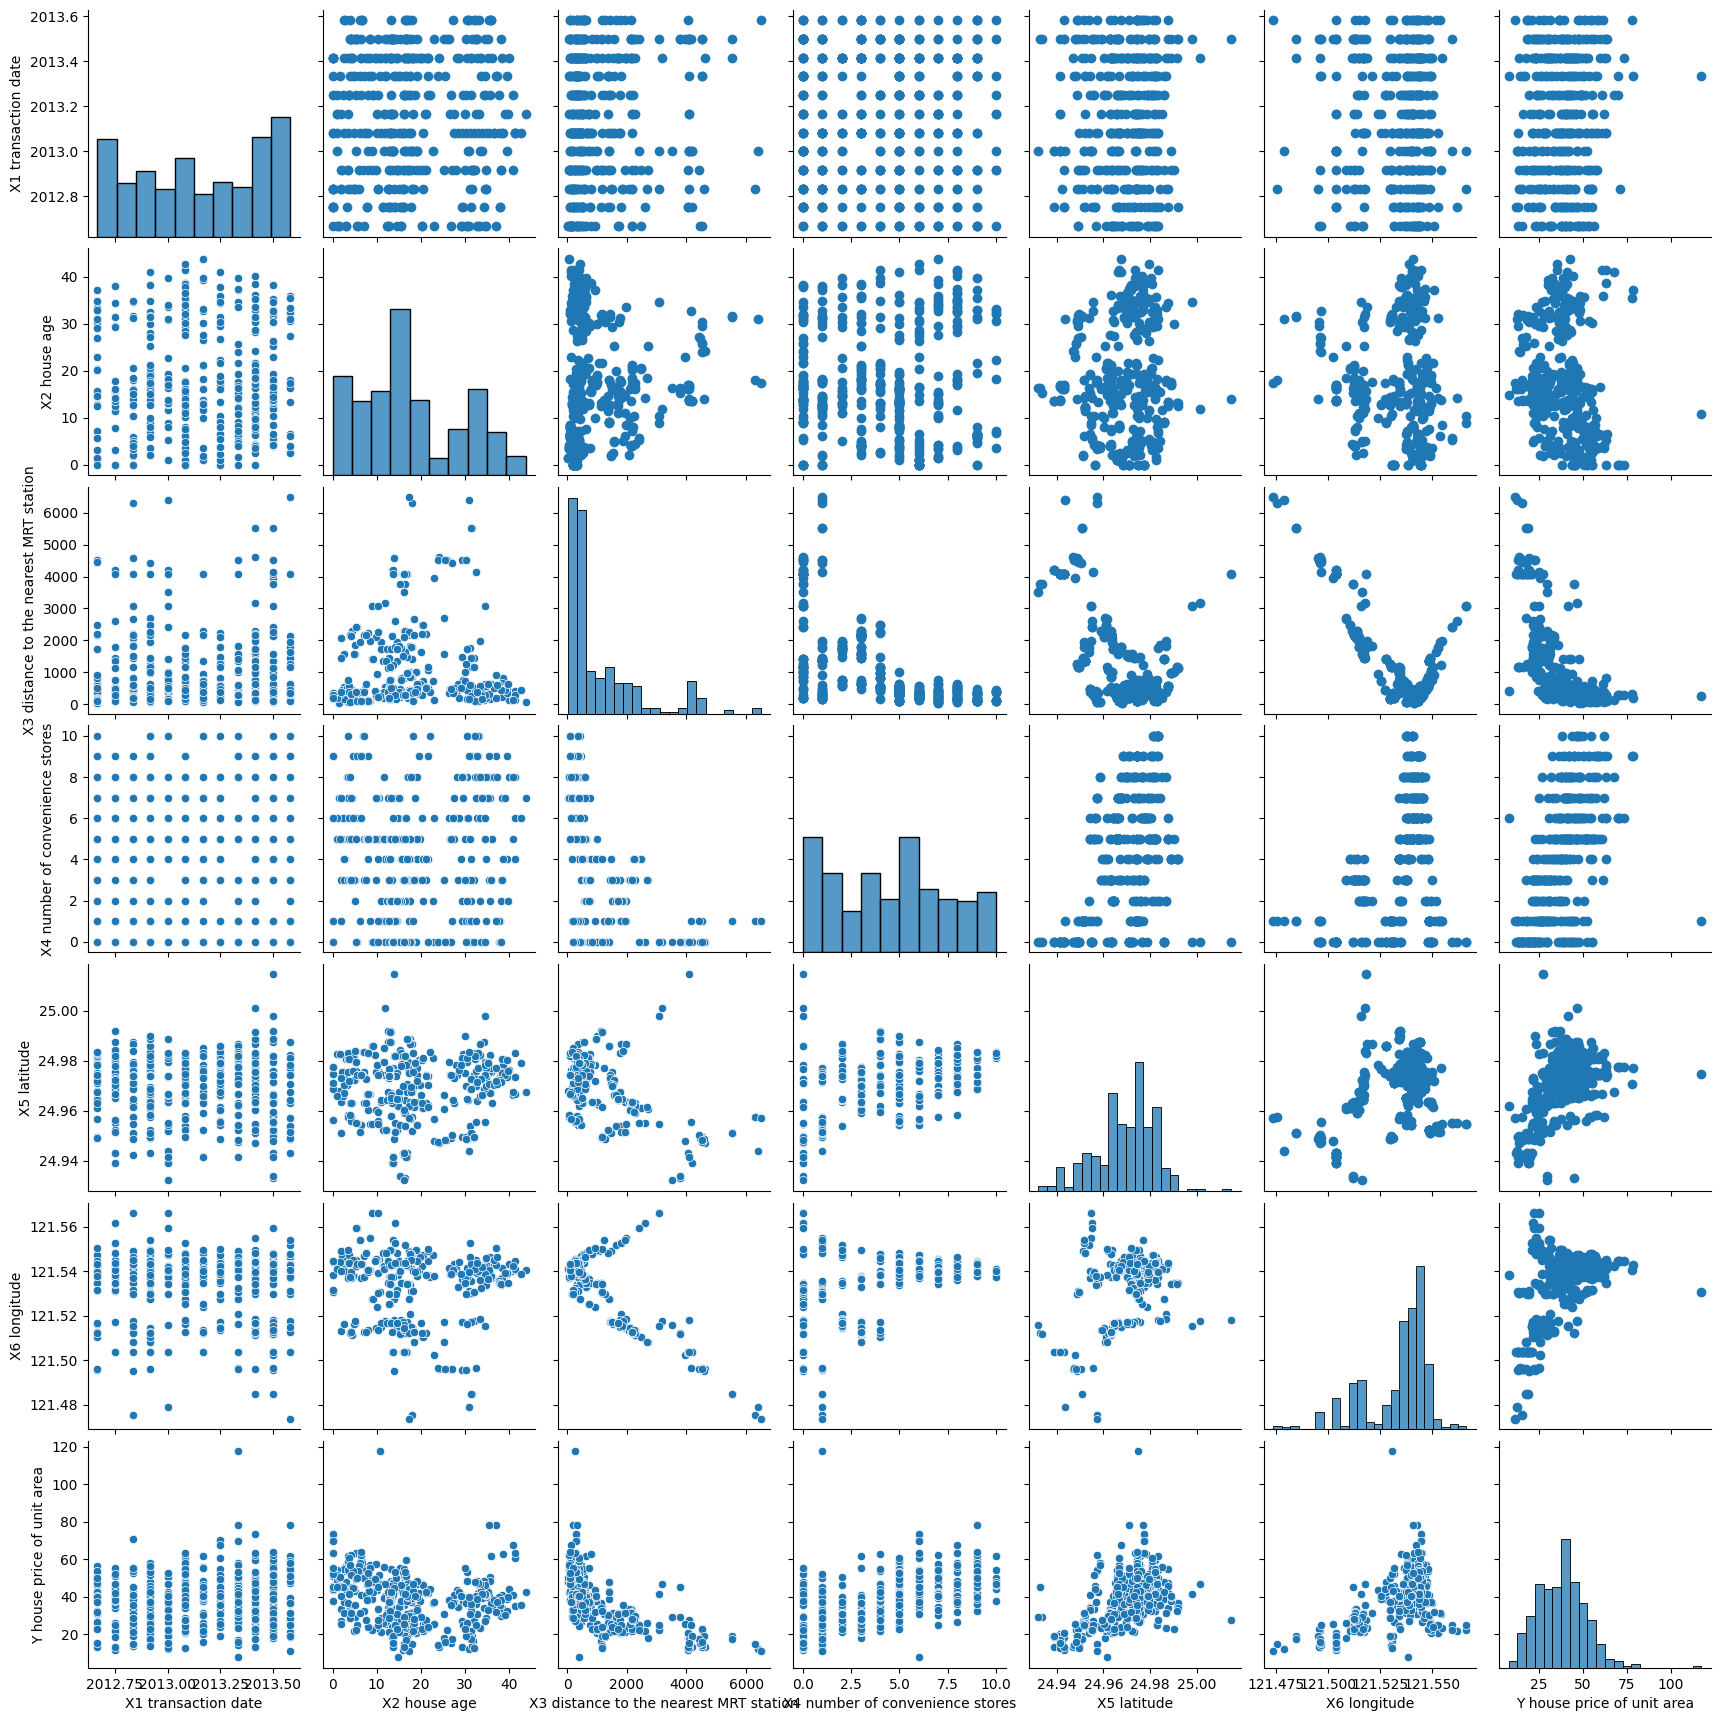

In [ ]:
#EDA
g = sns.pairplot(df)
g.map_upper(plt.scatter)

In [ ]:
df.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
X2 house age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: >

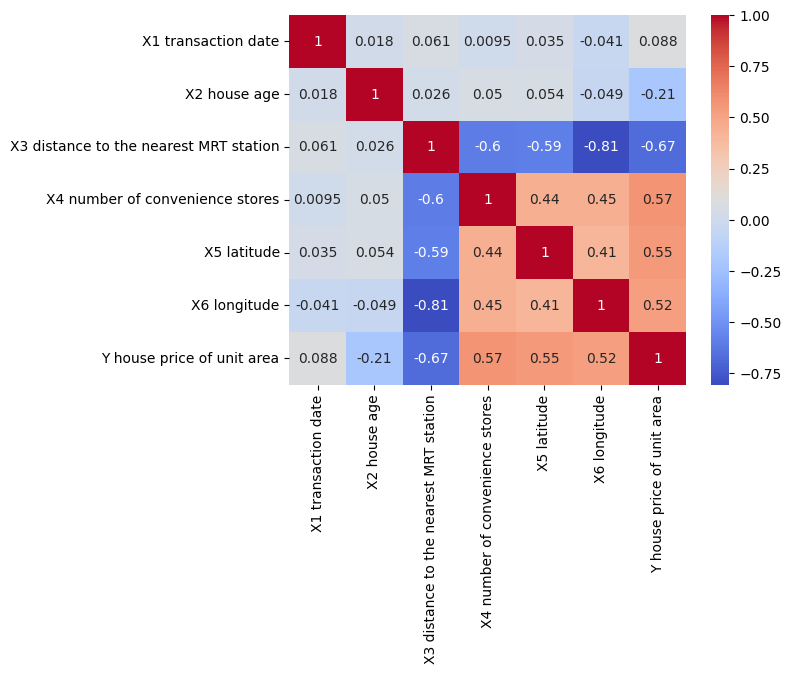

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Text(0.5, 9.444444444444438, 'house price of unit area')

<Figure size 1000x400 with 0 Axes>

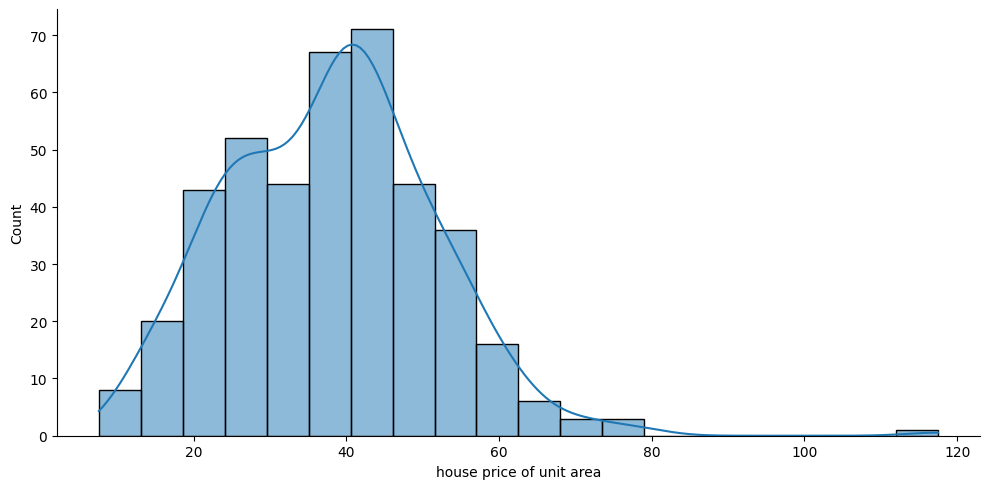

In [ ]:
plt.figure(figsize=(10,4))
sns.displot(df['Y house price of unit area'],kde=True,bins=20, aspect=2)
plt.xlabel('house price of unit area')

<Axes: xlabel='Y house price of unit area'>

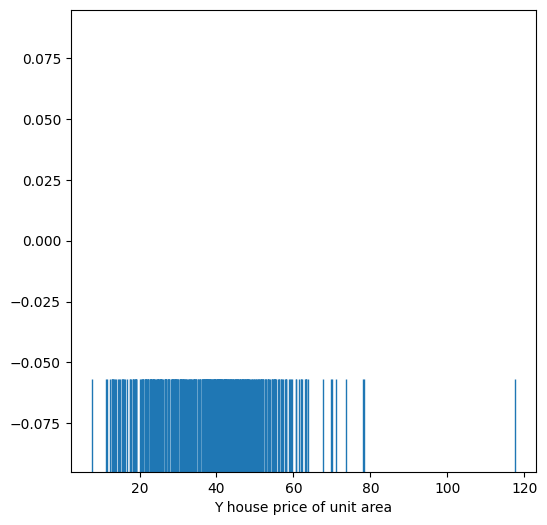

In [ ]:
plt.figure(figsize=(6,6),dpi= 100)
sns.rugplot(df['Y house price of unit area'], height=0.2)

<Axes: xlabel='X1 transaction date', ylabel='Y house price of unit area'>

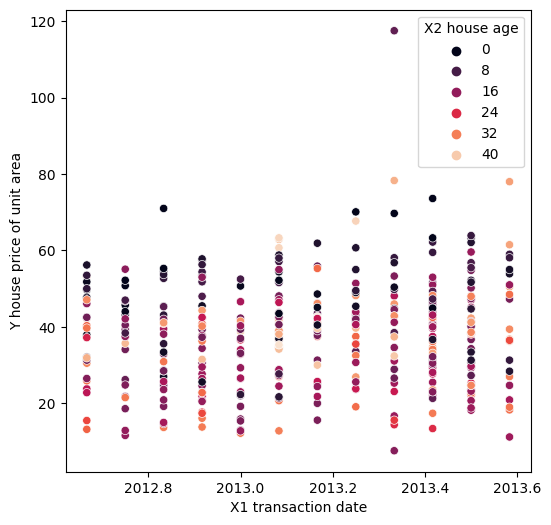

In [ ]:
plt.figure(figsize=(6,6),dpi=100)
sns.scatterplot(data=df, y=df['Y house price of unit area'], x=df['X1 transaction date'], hue='X2 house age', palette="rocket")

<Axes: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

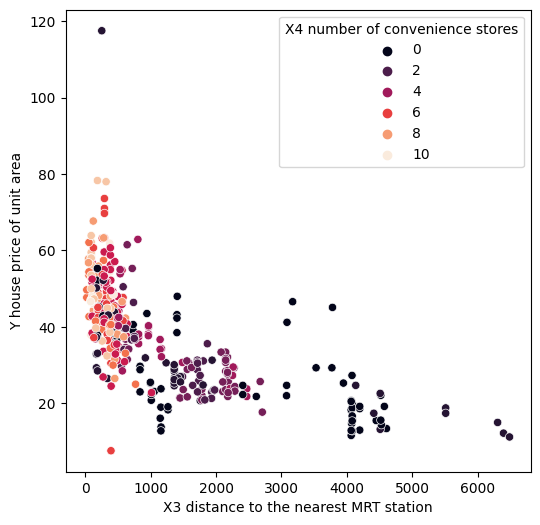

In [ ]:
plt.figure(figsize=(6,6),dpi = 100)
sns.scatterplot(data=df, y=df['Y house price of unit area'],x=df['X3 distance to the nearest MRT station'], hue ='X4 number of convenience stores',palette="rocket")

<Axes: xlabel='X5 latitude', ylabel='Y house price of unit area'>

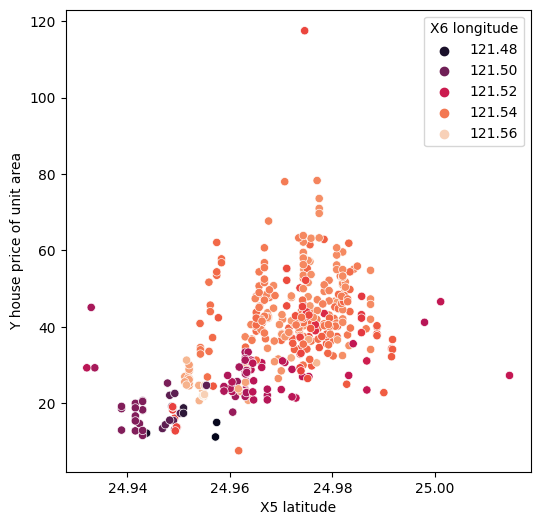

In [ ]:
plt.figure(figsize=(6,6),dpi=100)
sns.scatterplot(data=df, y=df['Y house price of unit area'], x=df['X5 latitude'], hue= 'X6 longitude', palette="rocket")

In [ ]:
#Trining a linear RegressionModel
X = df.drop('Y house price of unit area',axis=1)
y = df['Y house price of unit area']

In [ ]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
from sklearn.utils.fixes import sklearn
#Split a data into train and test
## train out model on the training set and thenuse the test set to evaluate the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state= 101)

In [ ]:
X_train
#checking the Split

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,,
267,2013.250000,17.8,1783.18000,3,24.96731,121.51486
299,2013.333333,16.7,4082.01500,0,24.94155,121.50381
275,2013.166667,27.5,394.01730,7,24.97305,121.53994
356,2013.250000,3.8,383.86240,5,24.98085,121.54391
322,2012.916667,16.9,964.74960,4,24.98872,121.53411
...,...,...,...,...,...,...
64,2013.583333,2.6,533.47620,4,24.97445,121.54765
327,2013.500000,4.1,56.47425,7,24.95744,121.53711
338,2012.833333,31.3,600.86040,5,24.96871,121.54651


In [ ]:
X_train.shape

(289, 6)

In [ ]:
X_test.shape

(125, 6)

In [ ]:
y_test.shape

(125,)

In [ ]:
#training the model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit (X_train, y_train)

LinearRegression()

In [ ]:
lin_reg.coef_
pd.DataFrame(lin_reg.coef_,X.columns ,columns=['Coedicients'])

,Coedicients
X1 transaction date,4.843374
X2 house age,-0.274745
X3 distance to the nearest MRT station,-0.004189
X4 number of convenience stores,1.181246
X5 latitude,242.385264
X6 longitude,23.398605


In [ ]:
print (lin_reg.coef_)

[ 4.84337397e+00 -2.74744806e-01 -4.18852496e-03  1.18124639e+00
  2.42385264e+02  2.33986054e+01]


In [ ]:
print (lin_reg.intercept_)

-18603.29448431597


In [ ]:
#Test data predictions
y_pred = lin_reg.predict(X_test)

In [ ]:
print(X_test)

     X1 transaction date  X2 house age  \
No                                       
177          2012.833333          13.9   
348          2013.583333          17.4   
308          2012.833333          10.3   
300          2013.166667          33.2   
392          2013.583333           6.2   
..                   ...           ...   
17           2013.250000           0.0   
32           2012.750000          29.6   
37           2012.916667          14.7   
42           2013.500000          16.8   
25           2013.000000          39.6   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
No                                                                             
177                               4573.7790                                0   
348                               6488.0210                                1   
308                               3079.8900                                0   
300                                121.7262          

In [ ]:
dframe = pd.DataFrame(y_test,y_pred)

In [ ]:
dfr=pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [ ]:
print(dfr)

     actual  predicted
No                    
177    19.2  12.638923
348    11.2  10.034359
308    24.7  22.988521
300    46.1  48.501285
392    31.3  32.674843
..      ...        ...
17     70.1  51.625474
32     25.0  41.313074
37     22.9  30.376127
42     18.2  16.009248
25     38.8  35.304258

[125 rows x 2 columns]


In [ ]:
dfr.head(15)

,actual,predicted
No,,
177,19.2,12.638923
348,11.2,10.034359
308,24.7,22.988521
300,46.1,48.501285
392,31.3,32.674843
213,31.1,37.828241
105,30.5,36.088302
312,42.2,41.058059
99,51.0,47.847837


In [ ]:
#Regression Evaluation Metrics
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE,MSE,RMSE],index=['MAE','MSE','RMSE'], columns=['Metrices'])

,Metrices
MAE,5.392383
MSE,46.210839
RMSE,6.797855


In [ ]:
graph=dfr.head(20)

<Axes: xlabel='No'>

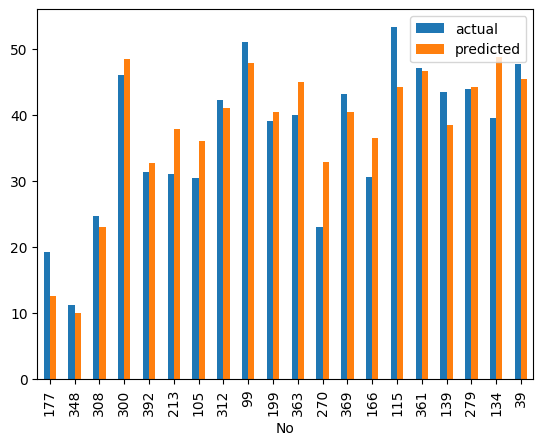

In [ ]:
graph.plot(kind='bar')